In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("FoodDelivery_Times.csv")

In [3]:
data

,Order_ID,Cities,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,Nehru Zoological Park,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,Nehru Zoological Park,Clear,Medium,Evening,Bike,20,2.0,84
2,741,Salar Jung Museum,Foggy,Low,Night,Scooter,28,1.0,59
3,661,Salar Jung Museum,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,Hussain Sagar,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,Golkonda Fort,Clear,High,Evening,Car,13,3.0,54
996,271,Ramoji Film City,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,Golkonda Fort,Snowy,High,Evening,Scooter,26,2.0,81
998,436,Chowmahalla Palace,Clear,Low,Afternoon,Bike,8,0.0,55


In [4]:
data.isnull().sum()

Order_ID                   0
Cities                     0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [5]:
data['Cities'].dropna()

0      Nehru Zoological Park
1      Nehru Zoological Park
2          Salar Jung Museum
3          Salar Jung Museum
4              Hussain Sagar
               ...          
995            Golkonda Fort
996         Ramoji Film City
997            Golkonda Fort
998       Chowmahalla Palace
999             Birla Mandir
Name: Cities, Length: 1000, dtype: object

In [6]:
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])

In [7]:
data['Traffic_Level'] = data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])

In [9]:
le =  LabelEncoder()

In [10]:
data['City'] = le.fit_transform(data['Cities'])

In [11]:
data['weather'] = le.fit_transform(data['Weather'])

In [12]:
data['Traffic'] = le.fit_transform(data['Traffic_Level'])

In [15]:
data['Time'] = le.fit_transform(data['Delivery_Time_min'])

In [16]:
model = DecisionTreeRegressor(random_state=42)

In [17]:
X = data[['City','weather','Traffic']]

In [18]:
y = data[['Time']]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)


19.619795312731693


In [33]:
rmae = np.sqrt(mae)
print(rmae)

4.429423812724596


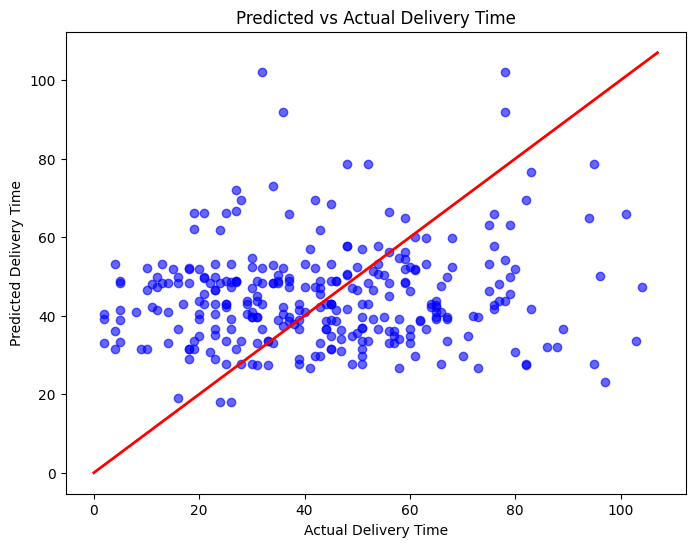

In [35]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Diagonal line
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Predicted vs Actual Delivery Time')
plt.show()


In [36]:
data_test = X_test.copy()

In [37]:
data_test['Actual_Time'] = y_test.values
data_test['Predicted_Time'] = y_pred


In [38]:
output = "FoodDelivery_Times.csv"

In [39]:
data_test.to_csv(output,index=False)

In [40]:
ab = data.groupby('Cities')['Time'].mean()


In [41]:
print("After using decision tree algo \n",ab)

After using decision tree algo 
 Cities
Birla Mandir             43.936937
Charminar                45.619565
Chowmahalla Palace       45.938144
Golkonda Fort            48.281250
HITEC City               42.329787
Hussain Sagar            45.302083
Lumbini Park             43.611111
Nehru Zoological Park    45.763636
Ramoji Film City         43.835052
Salar Jung Museum        41.616162
Name: Time, dtype: float64
